In [1]:
import azureml.core
import pandas as pd
from azureml.core.workspace import Workspace
from azureml.train.automl.run import AutoMLRun
import time
import logging
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
import random
import numpy as np

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
ws = Workspace.from_config()
# project folder to save your local files
project_folder = './sample_projects/automl-local-classification'
# choose a name for the run history container in the workspace
experiment_name = 'automl-classifier'

import os

output = {}
output['SDK version'] = azureml.core.VERSION
output['Subscription ID'] = ws.subscription_id
output['Workspace'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
output['Project Directory'] = project_folder
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(data=output, index=['']).T

Found the config file in: /home/nbuser/library/config.json
Performing interactive authentication. Please follow the instructions on the terminal.


To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code F7VRPCCE7 to authenticate.


Interactive authentication successfully completed.


,
SDK version,0.1.65
Subscription ID,b9506315-fbe2-4849-956a-488a42545b01
Workspace,leonMLTest
Resource Group,leonAMLTest
Location,southeastasia
Project Directory,./sample_projects/automl-local-classification


In [6]:
from sklearn import datasets

digits = datasets.load_digits()

# Exclude the first 100 rows from training so that they can be used for test.
X_train = digits.data[100:,:]
y_train = digits.target[100:]

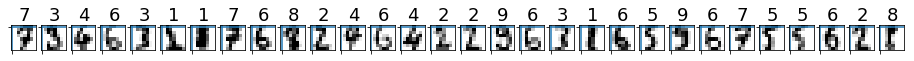

In [7]:
count = 0
sample_size = 30
plt.figure(figsize = (16, 6))
for i in np.random.permutation(X_train.shape[0])[:sample_size]:
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x = 2, y = -2, s = y_train[i], fontsize = 18)
    plt.imshow(X_train[i].reshape(8, 8), cmap = plt.cm.Greys)
plt.show()

In [11]:
from azureml.train.automl import AutoMLConfig
Automl_config = AutoMLConfig(task = 'classification',
                             primary_metric = 'accuracy',
                             max_time_sec = 120,
                             iterations = 10,
                             n_cross_validations = 5,
                             preprocess = False,
                             exit_score = 0.99,
                             ##blacklist_algos = ['kNN','LinearSVM'],
                             X = X_train,
                             y = y_train,
                             path=project_folder)

In [12]:
from azureml.core.experiment import Experiment
experiment=Experiment(ws, experiment_name)
local_run = experiment.submit(Automl_config, show_output=True)

Parent Run ID: AutoML_78622867-bcab-4ce1-b5e5-e56299ce97a3
***********************************************************************************************
ITERATION: The iteration being evaluated.
PIPELINE: A summary description of the pipeline being evaluated.
DURATION: Time taken for the current iteration.
METRIC: The result of computing score on the fitted pipeline.
BEST: The best observed score thus far.
***********************************************************************************************

 ITERATION     PIPELINE                               DURATION                METRIC      BEST
         0      StandardScalerWrapper ExtraTreesClassi0:00:52.567145           0.689     0.689
         1      MinMaxScaler KNeighborsClassifier     0:00:49.292770           0.987     0.987
         2      MaxAbsScaler DecisionTreeClassifier   0:00:46.750076           0.275     0.987
         3      StandardScalerWrapper KNeighborsClassi0:00:52.685988           0.972     0.987
         4      

In [13]:
from azureml.core.experiment import Experiment
experiment=Experiment(ws, experiment_name)
local_run = AutoMLRun(experiment, "AutoML_6399013a-e320-4a3a-a248-fa8432ce0013")

from azureml.train.widgets import RunDetails
RunDetails(local_run).show()

_AutoML(widget_settings={'childWidgetDisplay': 'popup'})

In [20]:
children = list(local_run.get_children())
metricslist = {}
for run in children:
    properties = run.get_properties()
    metrics = {k: v for k, v in run.get_metrics().items() if isinstance(v, float)}
    metricslist[int(properties['iteration'])] = metrics

import pandas as pd
rundata = pd.DataFrame(metricslist).sort_index(1)
rundata

,0,1,2,3,4,5,6,7,8,9
AUC_macro,0.949786,0.996163,0.779300,0.998939,0.999245,0.500000,0.966204,0.688310,0.506201,0.500000
AUC_micro,0.943599,0.996079,0.814377,0.998999,0.999374,0.482275,0.965067,0.691380,0.471076,0.468659
AUC_weighted,0.949502,0.996065,0.777518,0.998924,0.999242,0.500000,0.966475,0.690270,0.506240,0.500000
accuracy,0.688850,0.987040,0.274635,0.972301,0.968176,0.091319,0.760791,0.203920,0.076609,0.072488
accuracy_max,0.688850,0.987040,0.987040,0.987040,0.987040,0.987040,0.987040,0.987040,0.987040,0.987040
average_precision_score_macro,0.783325,0.986964,0.242587,0.995699,0.994101,0.100000,0.842710,0.280212,0.106529,0.100000
average_precision_score_micro,0.721437,0.986864,0.285580,0.995728,0.994968,0.096535,0.814555,0.298887,0.095932,0.092042
average_precision_score_weighted,0.786068,0.987011,0.245415,0.995732,0.994279,0.102123,0.847455,0.284874,0.108980,0.102123
balanced_accuracy,0.827896,0.992949,0.608918,0.984729,0.982361,0.500000,0.867853,0.556479,0.503395,0.500000
f1_score_macro,0.652786,0.986668,0.150318,0.971549,0.967318,0.016680,0.753361,0.077186,0.024761,0.013493


# 注册Best Model

In [21]:
# find the run with the highest accuracy value.
best_run, fitted_model = local_run.get_output()

# register model in workspace
description = 'Automated Machine Learning Model'
tags = None
model = local_run.register_model(description=description, tags=tags)
local_run.model_id # Use this id to deploy the model as a web service in Azure

Registering model AutoML6399013aebest


'AutoML6399013aebest'

In [26]:
%%writefile score.py
import pickle
import json
import numpy
from sklearn.externals import joblib
from azureml.core.model import Model


def init():
    global model
    model_path = Model.get_model_path(model_name = '<<modelid>>') # this name is model.id of model that we want to deploy
    # deserialize the model file back into a sklearn model
    model = joblib.load(model_path)

def run(rawdata):
    try:
        data = json.loads(rawdata)['data']
        data = numpy.array(data)
        result = model.predict(data)
    except Exception as e:
        result = str(e)
        return json.dumps({"error": result})
    return json.dumps({"result":result.tolist()})

Overwriting score.py


In [27]:
experiment_name = 'automl-classifier'

experiment = Experiment(ws, experiment_name)
ml_run = AutoMLRun(experiment = experiment, run_id = local_run.id)
dependencies = ml_run.get_run_sdk_dependencies(iteration = 3)

No issues found in the SDK package versions.


In [28]:
for p in ['azureml-train-automl', 'azureml-sdk', 'azureml-core']:
    print('{}\t{}'.format(p, dependencies[p]))

azureml-train-automl	0.1.65
azureml-sdk	0.1.65
azureml-core	0.1.65


In [29]:
%%writefile myenv.yml
name: myenv
channels:
  - defaults
dependencies:
  - pip:
    - numpy==1.14.2
    - scikit-learn==0.19.2
    - azureml-sdk[notebooks,automl]==<<azureml-version>>

Overwriting myenv.yml


In [30]:
# Substitute the actual version number in the environment file.

conda_env_file_name = 'myenv.yml'

with open(conda_env_file_name, 'r') as cefr:
    content = cefr.read()

with open(conda_env_file_name, 'w') as cefw:
    cefw.write(content.replace('<<azureml-version>>', dependencies['azureml-sdk']))

# Substitute the actual model id in the script file.

script_file_name = 'score.py'

with open(script_file_name, 'r') as cefr:
    content = cefr.read()

with open(script_file_name, 'w') as cefw:
    cefw.write(content.replace('<<modelid>>', local_run.model_id))

# 创建Docker Image

In [31]:
from azureml.core.image import Image, ContainerImage

image_config = ContainerImage.image_configuration(runtime= "python",
                                 execution_script = script_file_name,
                                 conda_file = conda_env_file_name,
                                 tags = {'area': "digits", 'type': "automl_classification"},
                                 description = "Image for automl classification sample")

image = Image.create(name = "automlsampleimage",
                     # this is the model object 
                     models = [model],
                     image_config = image_config, 
                     workspace = ws)

image.wait_for_creation(show_output = True)

Creating image
Running....................
SucceededImage creation operation finished for image automlsampleimage:6, operation "Succeeded"


# 部署ACI Web Service

In [32]:
from azureml.core.webservice import AciWebservice
from azureml.core.webservice import Webservice

aciconfig = AciWebservice.deploy_configuration(cpu_cores = 1, 
                                               memory_gb = 1, 
                                               tags = {'area': "digits", 'type': "automl_classification"}, 
                                               description = 'sample service for Automl Classification')

aci_service_name = 'automl-aci-01'
aci_service = AciWebservice(ws, aci_service_name)
print(aci_service.state)

if(aci_service.state != 'Healthy'):
    aci_service_name = 'automl-aci-02'
    aci_service = Webservice.deploy_from_image(deployment_config = aciconfig,
                                           image = image,
                                           name = aci_service_name,
                                           workspace = ws)
    aci_service.wait_for_deployment(True)

Healthy


# 创建AKS Cluster

In [33]:
from azureml.core.compute import AksCompute, ComputeTarget

# Use the default configuration (you can also provide parameters to customize this)
prov_config = AksCompute.provisioning_configuration()

aks_name = 'atuoml-aks-01' 
# Create the cluster
aks_target = ComputeTarget.create(workspace = ws, 
                                    name = aks_name, 
                                    provisioning_configuration = prov_config)

# Wait for the create process to complete
aks_target.wait_for_completion(show_output = True)
print(aks_target.provisioning_state)
print(aks_target.provisioning_errors)

SucceededProvisioning operation finished, operation "Succeeded"
Succeeded
None


# 部署 AKS Web Service

In [34]:
from azureml.core.webservice import Webservice, AksWebservice

# Set configuration and service name
aks_config = AksWebservice.deploy_configuration()
aks_service_name ='atuoml-aks-srv-01'
aks_service = AksWebservice(ws, aks_service_name)

if(aks_service.state != 'Healthy'):
    # Deploy from image
    aks_service = Webservice.deploy_from_image(workspace = ws, 
                                            name = aks_service_name,
                                            image = image,
                                            deployment_config = aks_config,
                                            deployment_target = aks_target)
    # Wait for the deployment to complete
    aks_service.wait_for_deployment(show_output = True)
    aks_service.get_logs()
    print(aks_service.state)

print(aks_service.state)

Healthy


In [75]:
print(aks_service.scoring_uri)

http://104.215.148.216/api/v1/service/atuoml-aks-srv-01/score


In [76]:
print(aci_service.scoring_uri)

http://52.163.87.19:80/score


# 测试 ACI Web Service API

0


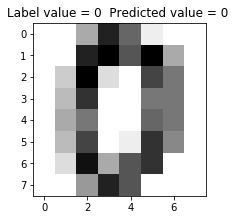

7


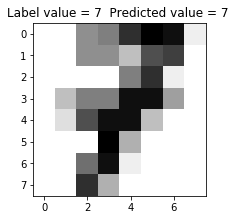

In [54]:
import json
import numpy as np
from sklearn import datasets

#Randomly select digits and test
digits = datasets.load_digits()
X_test = digits.data[:10, :]
y_test = digits.target[:10]
images = digits.images[:10]

for index in np.random.choice(len(y_test), 2, replace = False):
    print(index)
    test_sample = json.dumps({'data':X_test[index:index + 1].tolist()})
    predicted = aci_service.run(input_data = test_sample)
    label = y_test[index]
    predictedDict = json.loads(predicted)
    title = "Label value = %d  Predicted value = %s " % ( label,predictedDict['result'][0])
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    plt.imshow(images[index], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.show()

# 测试AKS Web Service Rest API

In [55]:
import requests
import json

# send a random row from the test set to score
random_index = np.random.randint(0, len(X_test)-1)
input_data = "{\"data\": [" + str(list(X_test[random_index])) + "]}"

#headers = {'Content-Type':'application/json'}

# for AKS deployment you'd need to the service key in the header as well
api_key = aks_service.get_keys()
print(api_key)
headers = {'Content-Type':'application/json','Authorization':('Bearer '+ api_key[0])} 

resp = requests.post(aks_service.scoring_uri, input_data, headers=headers)

print("POST to url", aks_service.scoring_uri)
# print("input data:", input_data)
print("label:", y_test[random_index])
print("prediction:", resp.text)

('UXdzMp0LpJDB1ZXUP2pxMAixaBbYe7I2', 'VvMViD8GpBONDZuvXcWNOPwQFwXuKNyP')
POST to url http://104.215.148.216/api/v1/service/atuoml-aks-srv-01/score
label: 1
prediction: "{\"result\": [1]}"


1


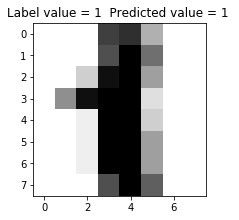

6


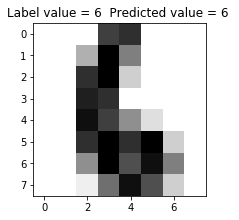

In [53]:
import json
import numpy as np
from sklearn import datasets

#digits = datasets.load_digits()
#Randomly select digits and test
digits = datasets.load_digits()
X_test = digits.data[:10, :]
y_test = digits.target[:10]
images = digits.images[:10]

for index in np.random.choice(len(y_test), 2, replace = False):
    print(index)
    test_sample = json.dumps({'data':X_test[index:index + 1].tolist()})
    predicted = aci_service.run(input_data = test_sample)
    label = y_test[index]
    predictedDict = json.loads(predicted)
    title = "Label value = %d  Predicted value = %s " % ( label,predictedDict['result'][0])
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    plt.imshow(images[index], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.show()